# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
# automated browser to url
browser.visit(url)
# Save the HTML as obj
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soupObj = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
#DataRow = soupObj.find_all('tr', class_='data-row')
DataHeader = soupObj.find_all('table', class_='table')

print(str(DataHeader[0])[:500])

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
TempReading = []

# Extract the column headings from the table
headings = []
for th in DataHeader[0].find_all('th'):
    headings.append(th.text.strip())

rows = []
for i in DataHeader[0].find_all('tr', {'class': 'data-row'}):
    row = []
    for td in i.find_all('td'):
        row.append(td.text.strip())
    rows.append(row)    

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=headings)

# Convert data types as needed
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df[['sol', 'ls', 'month']] = df[['sol', 'ls', 'month']].astype(int)
df[['min_temp', 'pressure']] = df[['min_temp', 'pressure']].astype(float)

In [8]:
# Confirm DataFrame was created successfully
print(df)  

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [10]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_of_months = df.loc[:, 'month'].nunique()
print(f"There are {num_of_months} months on Mars.")

There are 12 months on Mars.


In [13]:
# 2. How many Martian days' worth of data are there?
martian_days = df['sol'].nunique()
print(f"There are {martian_days} Martian days worth of data in the scraped dataset.")

There are 1867 Martian days worth of data in the scraped dataset.


In [14]:
# 3. What is the average low temperature by month?
monthly_means = df.groupby(df['terrestrial_date'].dt.month)['min_temp'].mean()
index = 1
for month in monthly_means:
    print(f"The average low temp for month number {index} is {month}.")
    index += 1

The average low temp for month number 1 is -76.98850574712644.
The average low temp for month number 2 is -76.9090909090909.
The average low temp for month number 3 is -77.34920634920636.
The average low temp for month number 4 is -76.09859154929578.
The average low temp for month number 5 is -75.57342657342657.
The average low temp for month number 6 is -75.67123287671232.
The average low temp for month number 7 is -76.177304964539.
The average low temp for month number 8 is -75.85161290322581.
The average low temp for month number 9 is -75.816091954023.
The average low temp for month number 10 is -75.68508287292818.
The average low temp for month number 11 is -75.5379746835443.
The average low temp for month number 12 is -75.99421965317919.


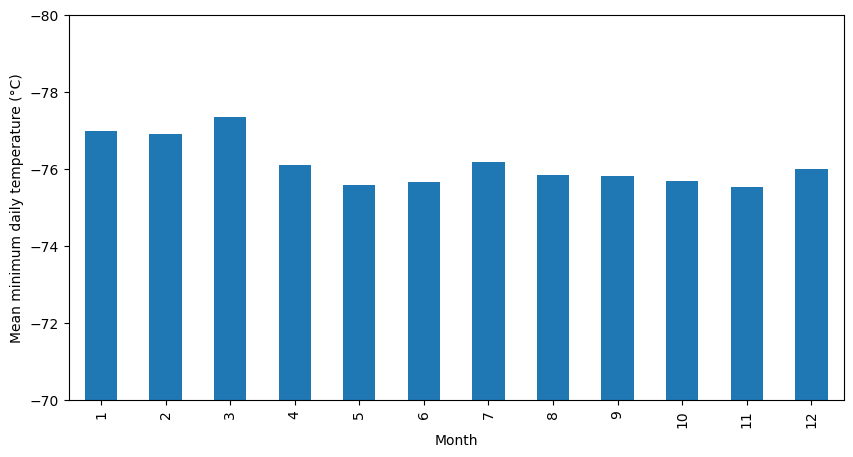

In [15]:
# Plot the average temperature by month
fig, ax = plt.subplots(figsize=(10, 5))
monthly_means.plot(kind='bar', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Mean minimum daily temperature (°C)')
ax.set_ylim([-80, -70]) # set y-axis limits
ax.invert_yaxis()
plt.show()

In [24]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = monthly_means.idxmin()
hottest_month = monthly_means.idxmax()
print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)

Coldest month: 3
Hottest month: 11


In [17]:
# 4. Average pressure by Martian month


In [18]:
# Plot the average pressure by month


In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV


In [21]:
browser.quit()